In [9]:
import numpy as np

# some_file.py
import sys
sys.path.insert(0, '../src/easyesn/')

In [10]:
from easyesn import SpatioTemporalESN
from easyesn.optimizers import GridSearchOptimizer
from easyesn import helper as hlp
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage.filters import convolve

np.random.seed(42)

In [11]:
inputLength = 5000
size = 50

data = np.linspace(0, 20*np.pi, inputLength)
data = np.repeat(data, size*size).reshape(-1, size, size)

freq1 = np.tile(np.random.rand(size, size), (inputLength, 1, 1))*2+1 
freq2 = np.tile(np.random.rand(size, size), (inputLength, 1, 1))*2+1

inputData = np.sin(freq1*data).reshape(-1, size, size)
outputData = np.cos(freq1*data).reshape(-1, size, size)

filter1 = np.array([[-1,-1,-1],
                   [-1,9,-1],
                   [-1,-1,-1]])/9.0

for i in range(inputLength):
    outputData[i, :, :] = convolve(outputData[i, :, :], filter1)

trainingInput = inputData[:int(inputLength*0.7)]
validationInput = inputData[int(inputLength*0.3):]

trainingOutput = outputData[:int(inputLength*0.7)]
validationOutput = outputData[int(inputLength*0.3):]

In [13]:
esn = SpatioTemporalESN(inputShape=(size, size), filterSize=3, stride=1, borderMode="mirror", averageOutputWeights=True,
                        n_reservoir=100, regression_parameters=[1e-2], leakingRate=0.2, spectralRadius=0.8, solver="lsqr")

In [14]:
esn.fit(trainingInput, trainingOutput, transientTime=10, verbose=1)

100% (2500 of 2500) |##################################################################################################################################################################################| Elapsed Time: 0:15:57 Time: 0:15:57


In [17]:
prediction = esn.predict(validationInput, transientTime=0, verbose=1)

100% (2500 of 2500) |##################################################################################################################################################################################| Elapsed Time: 0:09:28 Time: 0:09:28


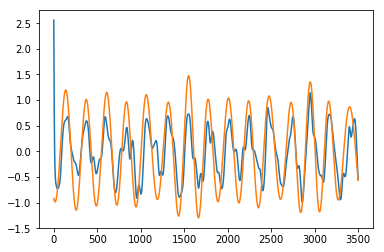

In [20]:
plt.plot(prediction[:, 15, 15])
plt.plot(validationOutput[:, 15, 15])
plt.show()

In [19]:
np.mean((prediction-validationOutput)**2, axis=None)

0.22928617637497051